<a href="https://colab.research.google.com/github/s27dsam/s27dsam/blob/main/Supermarket_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.signal import resample

In [68]:
df = pd.read_csv("supermarket_sales.csv")

In [12]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [41]:
df.shape

(1000, 17)

In [42]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [20]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [32]:
def heatmap():
  corr = df.corr()
  # constructing a heatmap to understand the correlatiom
  plt.figure(figsize = (8,8))
  sns.heatmap(corr, cbar=True, square=True, fmt='.2f',annot=True, annot_kws={'size':5}, cmap="mako")


In [139]:
def corr():
  #scatterplot
  sns.set()
  cols = ['Unit price', 'Quantity', 'Rating', 'Branch', 'Total', 'gross income', 'Gender']
  sns.pairplot(df[cols], size = 2.5)
  

In [140]:
def dist():
  # checking the distribution of the GLD Price
  sns.distplot(df['Total'],color='black')


In [141]:
def income():
  bins = np.linspace(0, 50, 90)
  y = df['gross income']
  plt.figure(figsize=(16,8))
  plt.title('Gross Income')
  plt.hist(y, bins=bins)
  plt.ylabel('Amount in USD')

In [165]:
def regression():
  y = df["Total"]
  x = df['Rating']
  # Fit a linear regression model to the data
  p = np.polyfit(x, y, 1)
  # Create a function that returns the predicted values for the model
  f = np.poly1d(p)
  # Plot the data and the regression line
  plt.figure(figsize=(16,8))
  plt.scatter(x, y)
  plt.plot(x, f(x), "r--")

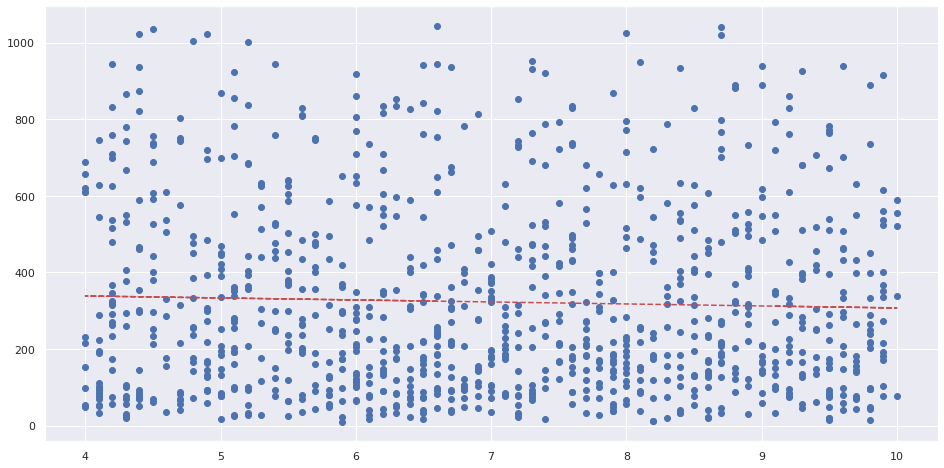

In [224]:
def box():
  #box plot Rating/unitprice
  # Round the values in column A to the nearest whole number
  rating = df["Rating"] = df["Rating"].round(0)
  # Convert the values in column A to integers
  rating = df["Rating"] = df["Rating"].astype(int)
  data = pd.concat([df['Unit price'], rating], axis=1)
  f, ax = plt.subplots(figsize=(8, 6))
  fig = sns.boxplot(x=rating, y="Unit price", data=data)
  fig.axis(ymin=10, ymax=105);
  # Add markers to the x-axis and y-axis
  plt.xticks([0, 1, 2, 3, 4, 5, 6], ["4","5","6","7","8","9","10"])
  plt.yticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100], ["Min","","Q1","","","Median","","Q3","","Max"])
  

In [231]:
def branch_sales():
  fig, ax = plt.subplots(figsize=(13,8))
  df.groupby('Branch')['Invoice ID'].count().plot.bar()
  plt.xlabel('Branch')
  plt.ylabel('Total number sales')


In [242]:
def product_line():
  fig, ax = plt.subplots(figsize=(13,8))
  df.groupby('Product line')['Invoice ID'].count().plot(kind='barh')
  plt.ylabel('Product line')
  plt.xlabel('Total number sales by product type')

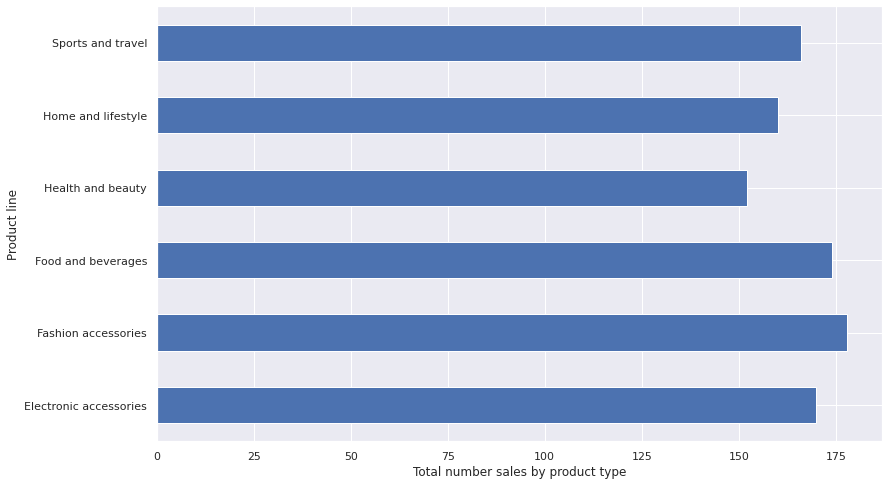

In [243]:
product_line()

In [261]:
def payment_type():
  fig, ax = plt.subplots(figsize=(16,16))
  df['Payment'].value_counts().plot.pie()
  plt.title('Payment type')

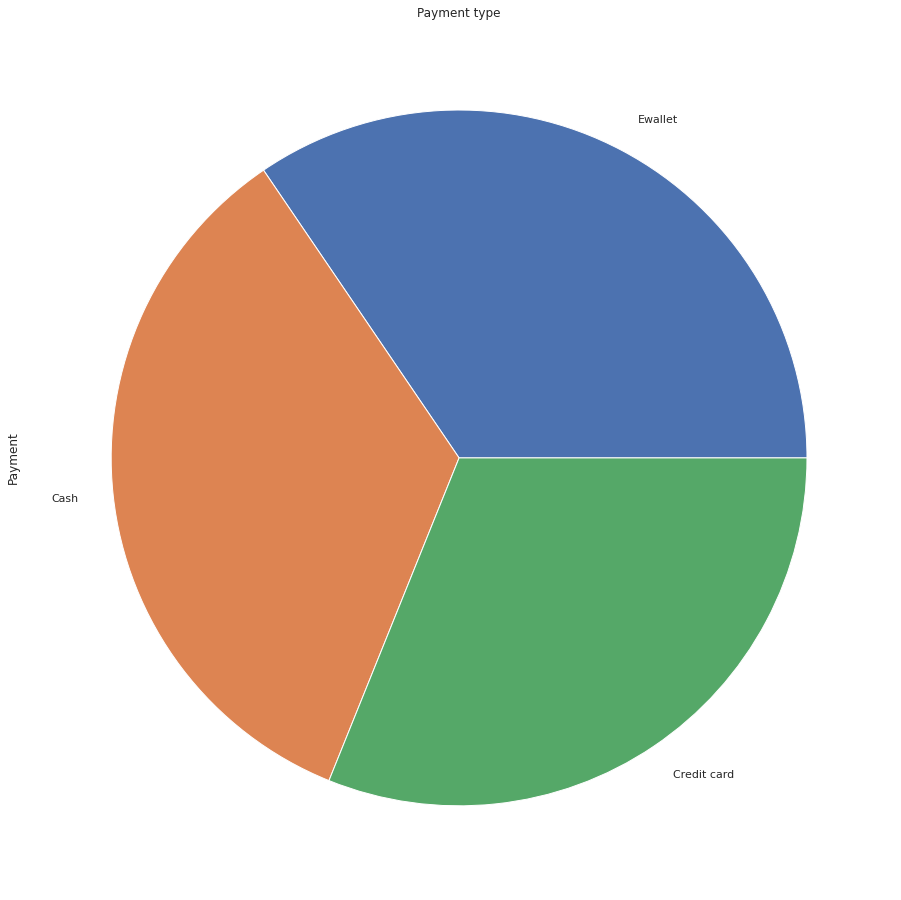